<a href="https://colab.research.google.com/github/Tajnabi-dev/Kabul_University/blob/main/Kabul_University_Face_Recognition_and_age_estimation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
# pip install deepface
# pip install retina-face

In [3]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace
from deepface.commons import functions
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import json
from retinaface import RetinaFace
import math

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


# Detection and alignment code start here

# Alignemtn Code Start here

In [ ]:
img1_path = "images/kamal.jpg"
img2_path = "images/cappic.jpg"
img3_path = "images/alignpic.jpg"

result = RetinaFace.detect_faces(img_path= img3_path)
# result 
x1, y1 = result['face_1']['landmarks']['right_eye']
x2, y2 = result['face_1']['landmarks']['left_eye']
a = abs(y1 - y2)

b = abs (x2 - x1)
c= math.sqrt(a*a + b*b) 
# to output the value
# a,b,c
c
# we find cos of angle
cos_alpha = (b*b + c*c - a*a) / (2a*b*c)
cos_alpha








537.3388711976828

# Detection Code Start here

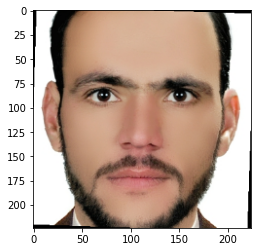

opencv  Backend  0.38604116439819336  Seconds
****************
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 25.0MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 89.1MB/s]


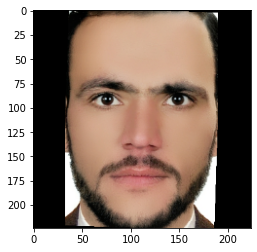

ssd  Backend  1.4465906620025635  Seconds
****************


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2


shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


100%|██████████| 5.71M/5.71M [00:00<00:00, 17.6MB/s]


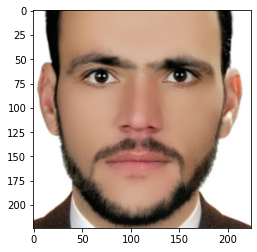

dlib  Backend  3.660543918609619  Seconds
****************


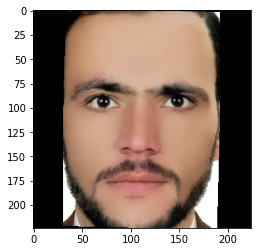

mtcnn  Backend  2.211354970932007  Seconds
****************


In [ ]:


detectors = ['opencv', 'ssd', 'dlib', 'mtcnn']

for detector in detectors:
  
  tic = time.time()
  img = DeepFace.detectFace(img_path = img1_path, detector_backend= detector)
  toc = time.time()
  
  plt.imshow(img)
  plt.show()

  print(detector, " Backend ", toc-tic, " Seconds")
  
  print("****************")


# img1 = DeepFace.detectFace(img1_path)
# img2 = DeepFace.detectFace(img2_path)
# plt.imshow(img1)
# plt.imshow(img2)



# Face Verification

In [ ]:
model_name = 'VGG-Face'
# support model Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace, Ensemble

resp = DeepFace.verify(img1_path = img1_path, img2_path = img2_path, model_name = model_name)
resp

# chech the reutn type of variable
# type(resp)

# we create a function and pass image path to it, the default model name is VGG-Face.
def mycustomfunction(img1_path, img2_path, model_name = 'VGG-Face') :
  img1 = cv2.imread(img1_path)
  img2 = cv2.imread(img2_path)
  plt.imshow(img1[:, :, ::-1])
  plt.show()
  plt.imshow(img2[:, :, ::-1])
  plt.show()
result = DeepFace.verify(img1_path, img2_path, model_name = model_name)
print('result: ', result)

veri = list(result.values())[0]
if veri:
  print("They are same and identified")
else:
  print("They are not same and not identified")
# we create a function and pass image path to it, the default model name is VGG-Face.


mycustomfunction("images/kamal.jpg", "images/cappic.jpg")



# code for find function
    
    # resp1 = DeepFace.find(img_path = img1_path, db_path = "images")
    # resp1

    # to speed up find function 
    # model = VGGFace.loadModel()
    # resp1 = DeepFace.find(img_path = img1_path, db_path = "images", model_name = model_name, model = model)
    # resp1

    # this will compare and verify with second image only in database
    # resp1.iloc[1]

    # you can only access one column, here identity is the name of column
    # resp1.iloc[1].identity

    # to check if image find in database
    # if resp1.shape[0] > 0:
    # 	matched = resp1.iloc[0].identity
    # 	print(matched)

# code for find function


NameError: ignored

# Facial Attribute Analysis

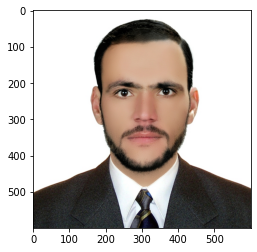

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


{'emotion': {'angry': 56.53643608093262,
  'disgust': 7.144770886036156e-08,
  'fear': 0.023936577781569213,
  'happy': 0.028001272585242987,
  'sad': 5.62845841050148,
  'surprise': 0.00012985055946046486,
  'neutral': 37.78303265571594},
 'dominant_emotion': 'angry',
 'region': {'x': 146, 'y': 98, 'w': 328, 'h': 328},
 'age': 27,
 'gender': 'Man',
 'race': {'asian': 1.8390662968158722,
  'indian': 8.017434179782867,
  'black': 0.9777439758181572,
  'white': 26.54178738594055,
  'middle eastern': 45.54355442523956,
  'latino hispanic': 17.080412805080414},
 'dominant_race': 'middle eastern'}

In [ ]:
img1 = cv2.imread(img1_path)
plt.imshow(img1[:, :, ::-1])
plt.show()

result = DeepFace.analyze(img1_path)
result

# demography_json = json.loads(demography)
# demography_json
# demography_json['age'] 


# vector distance

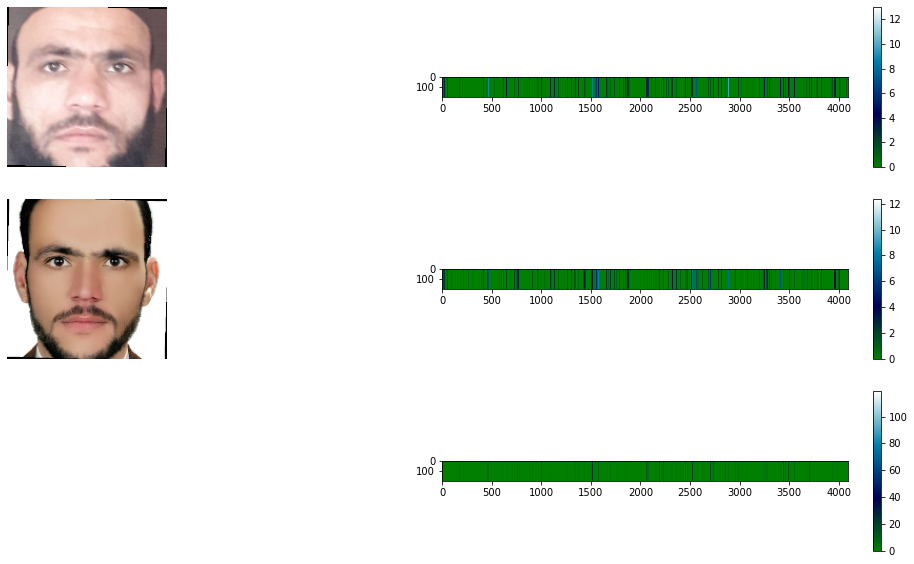

In [ ]:
# model = VGGFace.loadModel()
# model = Facenet.loadModel()
# model = OpenFace.loadModel()
model = FbDeepFace.loadModel()

# models = ['VGG-Face', 'Facenet', 'OpenFace', 'DeepFace', 'DeepID', 'Dlib']

input_shape = model.layers[0].input_shape
output_size = model.layers[-1].input_shape[-1]

if type(input_shape) == list:
  input_shape = input_shape[0][1:4]
else:
  input_shape = input_shape[1:4]

    
input_shape_x = input_shape[0]
input_shape_y = input_shape[1]

img1 = functions.preprocess_face(img="images/cappic.jpg", target_size=(input_shape_y, input_shape_x))
img2 = functions.preprocess_face(img="images/kamal.jpg", target_size=(input_shape_y, input_shape_x))

img1_representation = model.predict(img1)[0,:]
img2_representation = model.predict(img2)[0,:]

# to check multiplication of the vector or representation
# img1_representation.shape

# this code will find the distance between the vectors
distance_vector = np.square(img1_representation - img2_representation)

# to show the distance
# distance_vector
# distance = np.sqrt(distance_vector.sum()) 
# print("Distance between images is ", distance)

# this code will generate the graph for both images
img1_graph = [] 
img2_graph = []
distance_graph = []
for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)

# convert the graph to numpy array
img1_graph = np.array(img1_graph)
img2graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)


fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(3,2,1)
plt.imshow(img1[0][:,:,::-1])
plt.axis('off')

ax2 = fig.add_subplot(3,2,2)
im = plt.imshow(img1_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3,2,3)
plt.imshow(img2[0][:,:,::-1])
plt.axis('off')

ax4 = fig.add_subplot(3,2,4)
im = plt.imshow(img2_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3,2,5)
ax5.set_visible(False)


ax6 = fig.add_subplot(3,2,6)
im = plt.imshow(distance_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()



plt.show()
# this code will generate the graph for both images
